In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
import os
cd = '/content/drive/My Drive/hit140_datasets'
os.chdir(cd)

Mounted at /content/drive


In [ ]:
#Import Pandas
import pandas as pd

#Read the datasets into DataFrames
df1 = pd.read_csv('dataset1.csv')
df2 = pd.read_csv('dataset2.csv')
df3 = pd.read_csv('dataset3.csv')

#Merge the Datasets
df_merge = pd.merge(df1,df2, on='ID', how = 'inner') # merge on 'ID'
df_merge = pd.merge(df_merge,df3, on='ID',how = 'inner') # merge on 'ID'

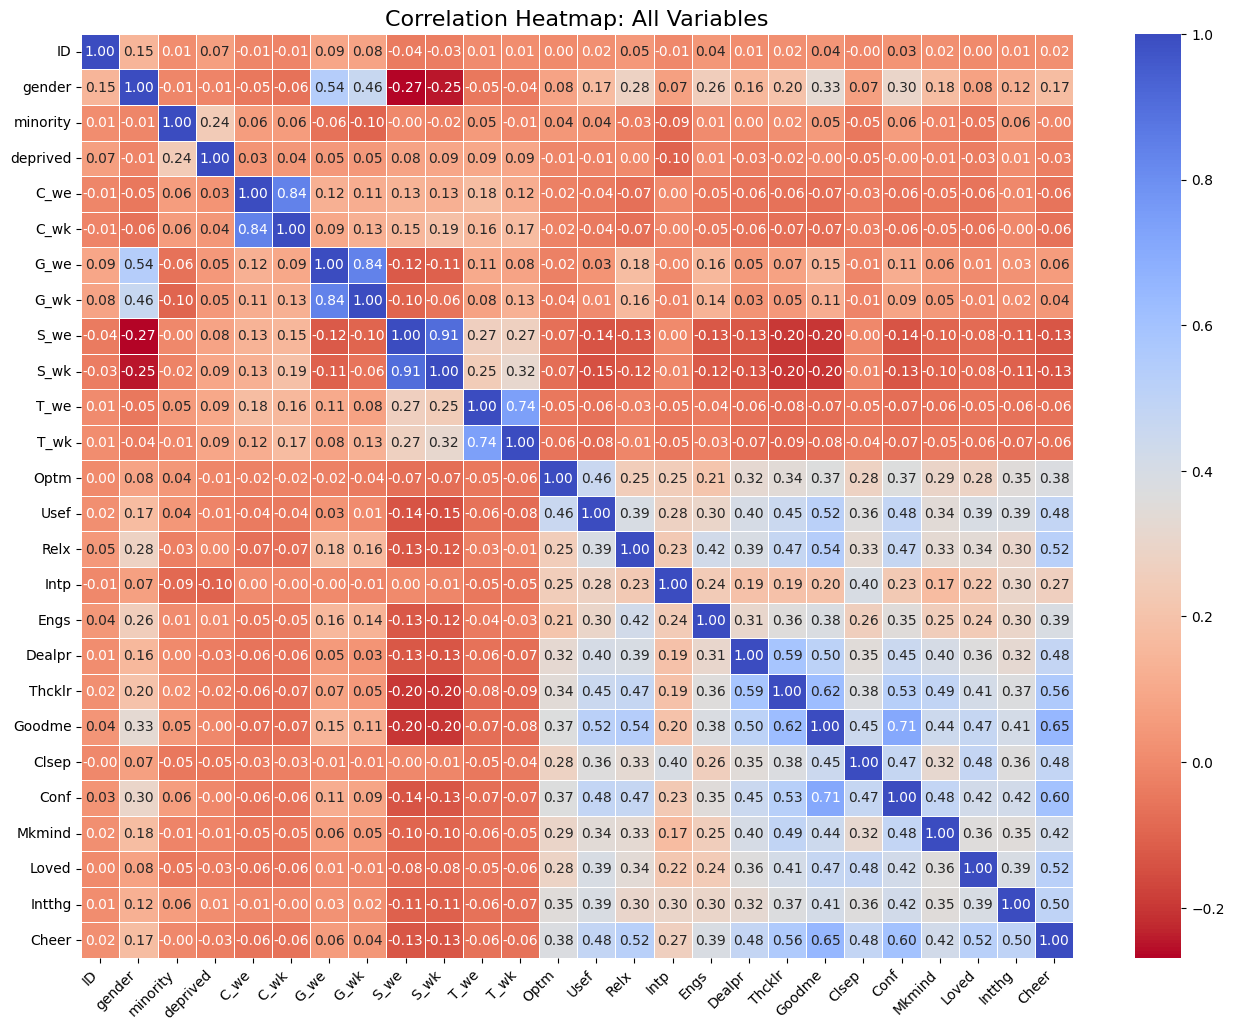

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets (replace with your actual file paths)
dataset1 = pd.read_csv('dataset1.csv')  # Replace with actual path
dataset2 = pd.read_csv('dataset2.csv')  # Replace with actual path
dataset3 = pd.read_csv('dataset3.csv')  # Replace with actual path

# Merge datasets on the 'ID' column
merged_data = pd.merge(pd.merge(dataset1, dataset2, on='ID'), dataset3, on='ID',how='inner')

# Calculate the correlation matrix for all numerical columns
correlation_matrix = merged_data.corr()

# Set up the figure for the heatmap
plt.figure(figsize=(16, 12))

# Create a heatmap for the correlation matrix with reversed color map (red = negative, blue = positive)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm_r", fmt=".2f", linewidths=0.5)

# Add titles and labels
plt.title("Correlation Heatmap: All Variables", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Display the heatmap
plt.show()


<Figure size 1200x800 with 0 Axes>

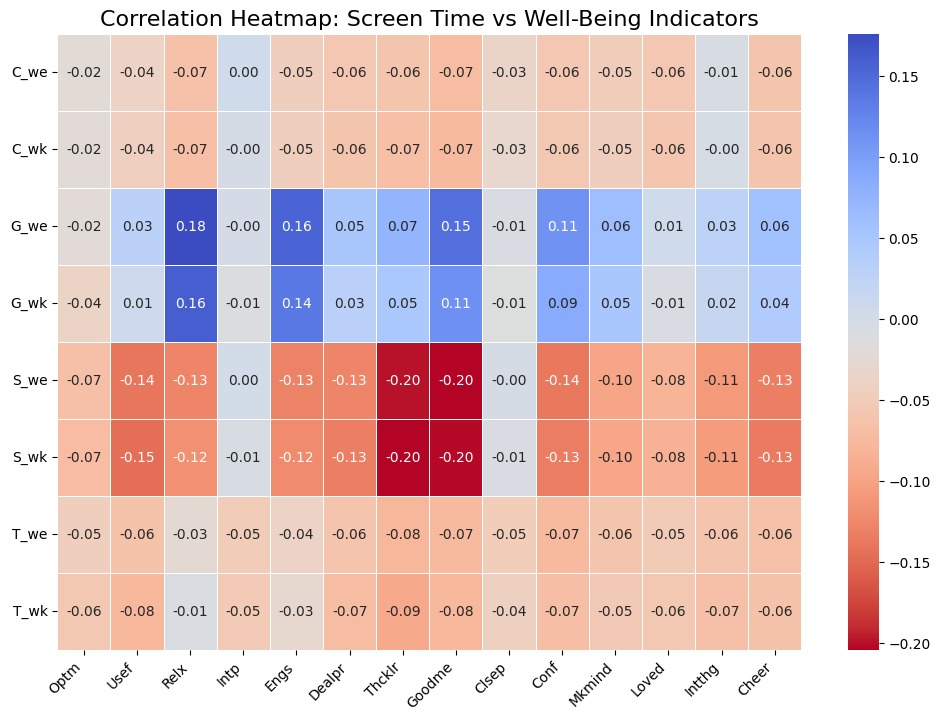

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets (make sure to update the paths if needed)
dataset2 = pd.read_csv('dataset2.csv')  # Replace with actual path
dataset3 = pd.read_csv('dataset3.csv')  # Replace with actual path

# Merge the datasets on the 'ID' column
merged_data = pd.merge(dataset2, dataset3, on='ID',how = 'inner')

# Set up the figure for the heatmap
plt.figure(figsize=(12, 8))

# Create a heatmap with reversed color map (red = negative, blue = positive

# Correlation analysis between screen time variables and well-being indicators
correlation_matrix = merged_data.corr()

# Define screen time and well-being columns
screen_time_columns = ['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk']
well_being_columns = ['Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'Dealpr', 'Thcklr', 'Goodme', 'Clsep', 'Conf', 'Mkmind', 'Loved', 'Intthg', 'Cheer']

# Extract correlations between screen time and well-being indicators
screen_time_wellbeing_correlation = correlation_matrix.loc[screen_time_columns, well_being_columns]

# Set up the figure for the heatmap
plt.figure(figsize=(12, 8))

# Create a heatmap with reversed color map (red = negative, blue = positive)
sns.heatmap(screen_time_wellbeing_correlation, annot=True, cmap="coolwarm_r", fmt=".2f", linewidths=0.5)

# Add titles and labels
plt.title("Correlation Heatmap: Screen Time vs Well-Being Indicators", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Display the heatmap
plt.show()


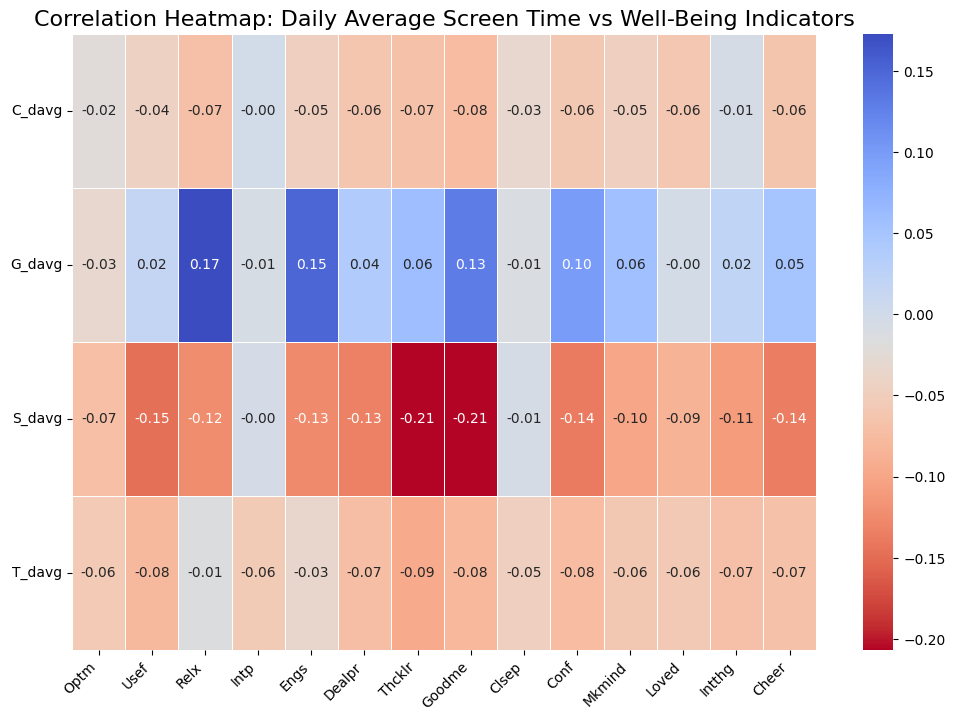

In [ ]:
# Step 1: Calculate '_davg' suffixed columns (daily average screen time)
dataset2['C_davg'] = (dataset2['C_we'] * 2 + dataset2['C_wk'] * 5) / 7
dataset2['G_davg'] = (dataset2['G_we'] * 2 + dataset2['G_wk'] * 5) / 7
dataset2['S_davg'] = (dataset2['S_we'] * 2 + dataset2['S_wk'] * 5) / 7
dataset2['T_davg'] = (dataset2['T_we'] * 2 + dataset2['T_wk'] * 5) / 7

# Drop the original screen time columns
screen_time_columns_to_drop = ['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk']


# Merge the cleaned dataset2 with dataset3 (well-being indicators)
merged_data = pd.merge(dataset2, dataset3, on='ID',how = 'inner')
merged_data = pd.merge(merged_data, dataset1, on='ID', how='inner')

# Drop the original screen time columns
merged_data_cleaned = merged_data.drop(columns=screen_time_columns_to_drop)
# Step 2: Calculate the correlation matrix between the daily average screen time and well-being indicators
correlation_matrix_davg = merged_data.corr()

# Define the new screen time columns with '_davg' suffix and well-being columns
davg_columns = ['C_davg', 'G_davg', 'S_davg', 'T_davg']
well_being_columns = ['Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'Dealpr', 'Thcklr', 'Goodme', 'Clsep', 'Conf', 'Mkmind', 'Loved', 'Intthg', 'Cheer']

# Extract correlations between daily average screen time and well-being indicators
davg_wellbeing_correlation = correlation_matrix_davg.loc[davg_columns, well_being_columns]

# Step 2: Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(davg_wellbeing_correlation, annot=True, cmap="coolwarm_r", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Daily Average Screen Time vs Well-Being Indicators", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


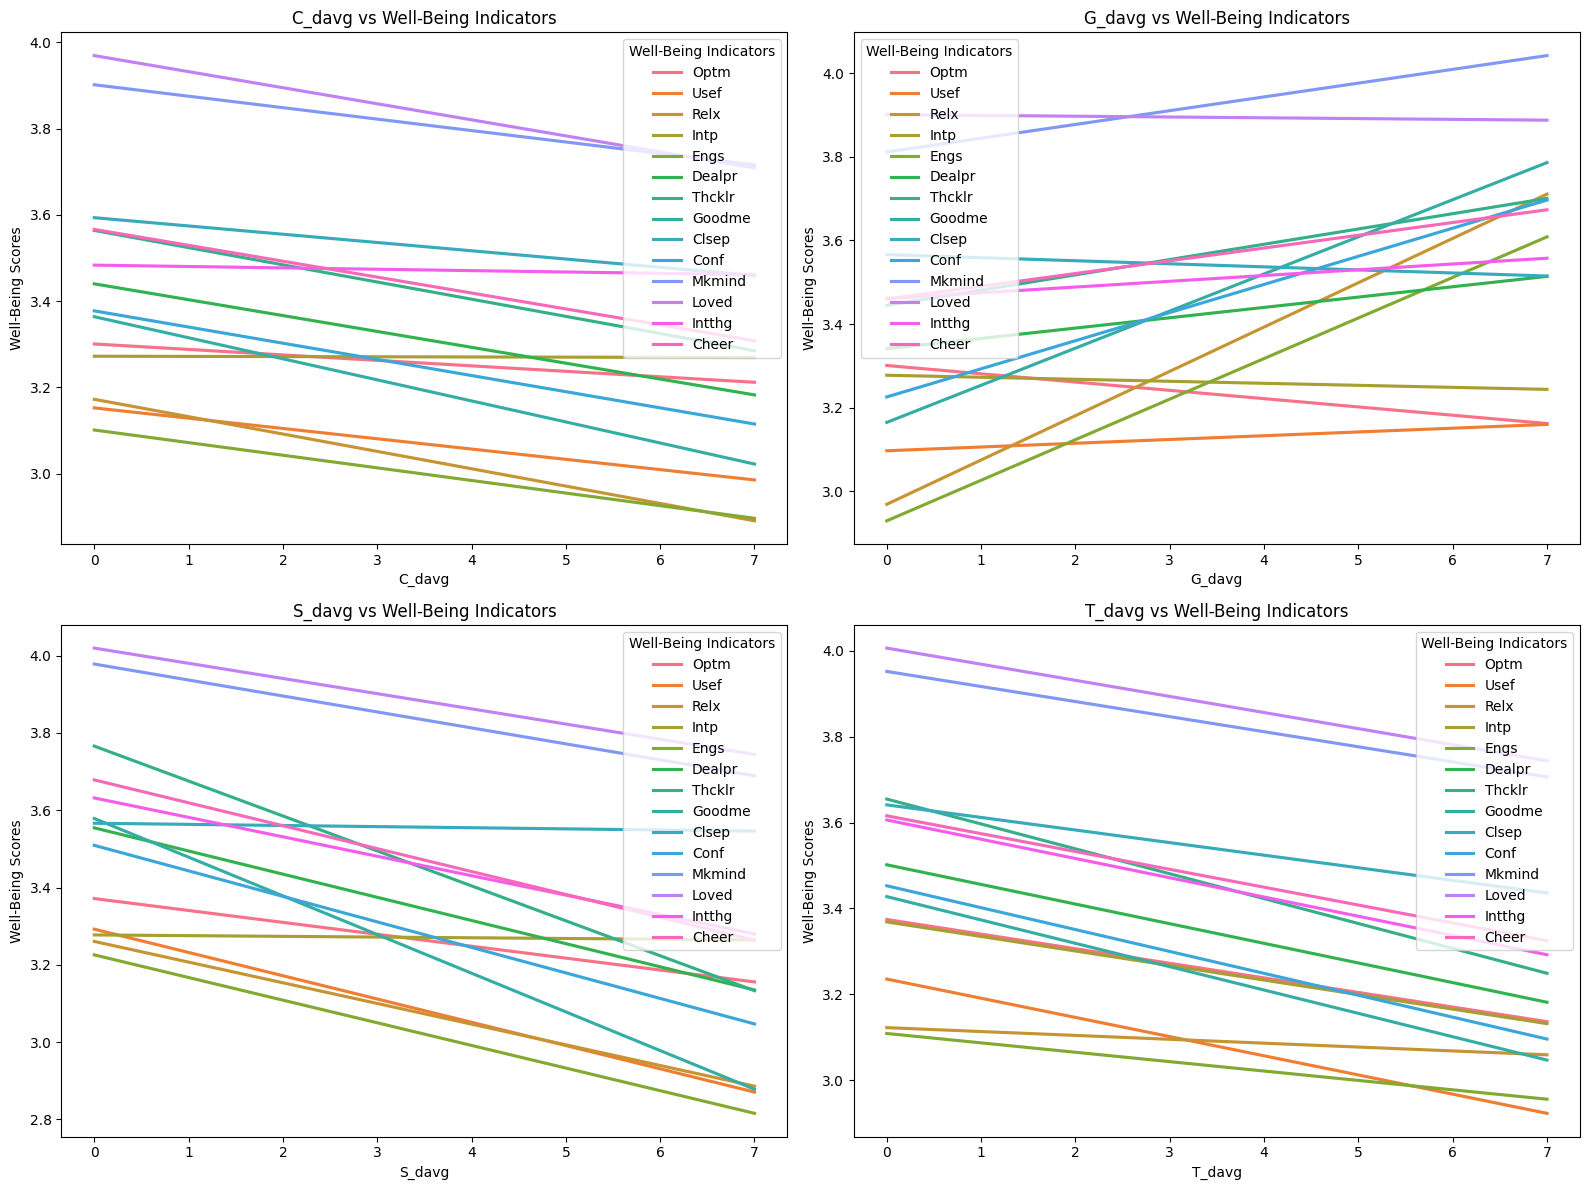

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
well_being_cols = ['Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'Dealpr', 'Thcklr', 'Goodme', 'Clsep', 'Conf', 'Mkmind', 'Loved', 'Intthg', 'Cheer']
# Define a color palette for different well-being indicators
colors = sns.color_palette("husl", len(well_being_cols))
davg_columns = ['C_davg', 'G_davg', 'S_davg', 'T_davg']
# Create a 2x2 plot for each screen time variable with colored lines and legends
plt.figure(figsize=(16, 12))
for i, screen_time_col in enumerate(davg_columns, 1):
    plt.subplot(2, 2, i)
    for idx, col in enumerate(well_being_cols):
        sns.regplot(x=screen_time_col, y=col, data=merged_data_cleaned, scatter=False, ci=None, line_kws={"color": colors[idx]}, label=col)
    plt.title(f'{screen_time_col} vs Well-Being Indicators')
    plt.xlabel(screen_time_col)
    plt.ylabel('Well-Being Scores')
    plt.legend(title='Well-Being Indicators', loc='best')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Function to calculate and print R-squared values for all well-being indicators and screen time variables
def calculate_r_squared(df, screen_time_col, well_being_cols):
    print(f"R-squared values for {screen_time_col}:")
    for col in well_being_cols:
        X = df[[screen_time_col]].values
        y = df[col].values
        # Fit linear regression model
        model = LinearRegression().fit(X, y)
        y_pred = model.predict(X)
        r_squared = r2_score(y, y_pred)
        print(f"{col}: {r_squared:.4f}")

# List of new screen time columns
screen_time_davg_cols = ['C_davg', 'G_davg', 'S_davg', 'T_davg']

# List of well-being columns
well_being_cols = ['Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'Dealpr', 'Thcklr', 'Goodme']

# Calculate and print R-squared values for each screen time column
for screen_time_col in screen_time_davg_cols:
    calculate_r_squared(merged_data_cleaned, screen_time_col, well_being_cols)


R-squared values for C_davg:
Optm: 0.0005
Usef: 0.0019
Relx: 0.0049
Intp: 0.0000
Engs: 0.0023
Dealpr: 0.0038
Thcklr: 0.0047
Goodme: 0.0058
R-squared values for G_davg:
Optm: 0.0011
Usef: 0.0002
Relx: 0.0298
Intp: 0.0001
Engs: 0.0222
Dealpr: 0.0015
Thcklr: 0.0035
Goodme: 0.0170
R-squared values for S_davg:
Optm: 0.0052
Usef: 0.0216
Relx: 0.0151
Intp: 0.0000
Engs: 0.0160
Dealpr: 0.0177
Thcklr: 0.0427
Goodme: 0.0428
R-squared values for T_davg:
Optm: 0.0032
Usef: 0.0061
Relx: 0.0002
Intp: 0.0030
Engs: 0.0011
Dealpr: 0.0052
Thcklr: 0.0089
Goodme: 0.0064


Correlation between screen time activities and composite well-being score:
C_davg: -0.0740
G_davg: 0.1014
S_davg: -0.1925
T_davg: -0.0909


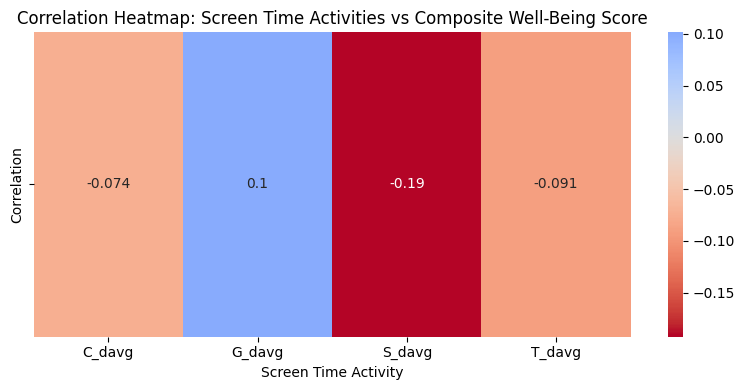

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate a composite well-being score by averaging all well-being indicators
merged_data['composite_wellbeing'] = merged_data[well_being_cols].mean(axis=1)

# List of screen time columns (daily average)
screen_time_davg_cols = ['C_davg', 'G_davg', 'S_davg', 'T_davg']

# Function to calculate and print correlation between composite well-being score and screen time activities
def calculate_composite_correlation(df, screen_time_cols, composite_col):
    correlations = {}
    print(f"Correlation between screen time activities and composite well-being score:")
    for col in screen_time_cols:
        correlation = df[col].corr(df[composite_col])
        correlations[col] = correlation
        print(f"{col}: {correlation:.4f}")
    return correlations

# Calculate the correlation
correlations = calculate_composite_correlation(merged_data, screen_time_davg_cols, 'composite_wellbeing')

# Convert the correlation result into a DataFrame for easier plotting
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Screen Time Activity', 'Correlation'])

# Plotting the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_df.set_index('Screen Time Activity').T, annot=True, cmap="coolwarm_r", center=0, cbar=True)
plt.title("Correlation Heatmap: Screen Time Activities vs Composite Well-Being Score")
plt.tight_layout()
plt.show()


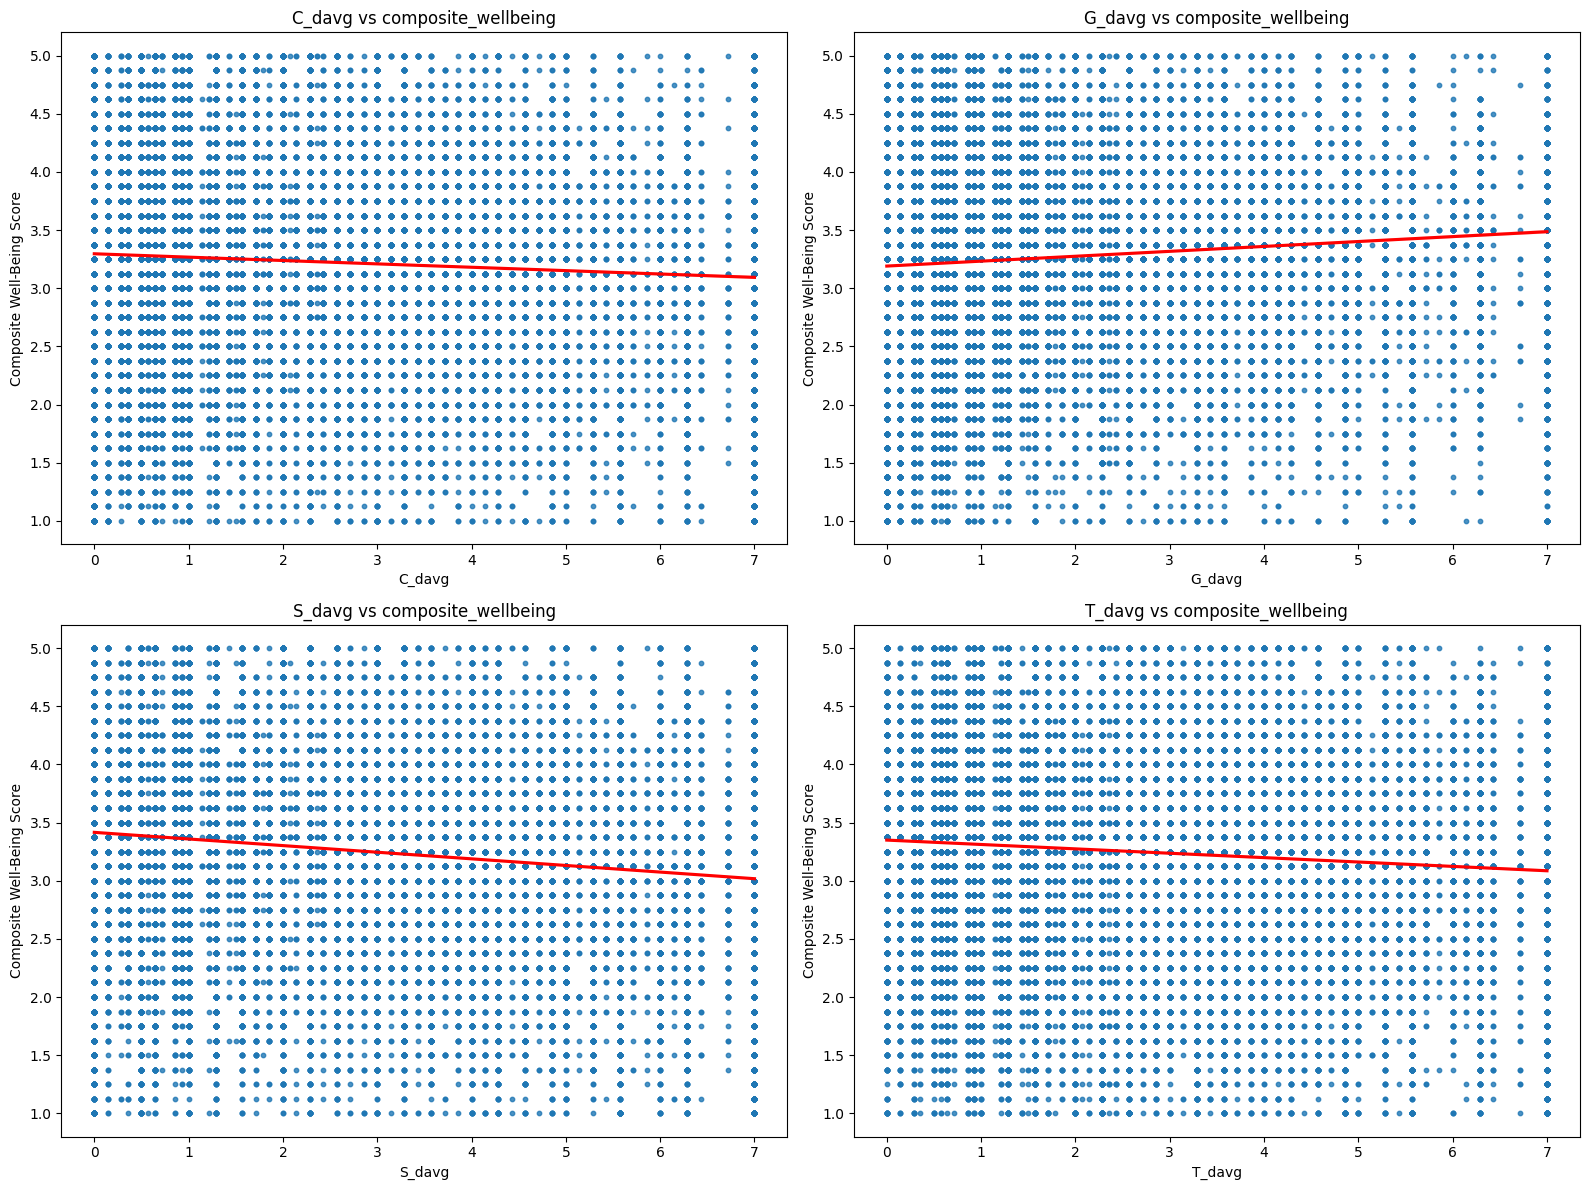

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot scatter plots with regression lines for each screen time activity and composite well-being score
def plot_scatter_with_regression(df, screen_time_cols, composite_col):
    plt.figure(figsize=(16, 12))
    for i, col in enumerate(screen_time_cols, 1):
        plt.subplot(2, 2, i)
        sns.regplot(x=col, y=composite_col, data=df, scatter_kws={'s':10}, line_kws={"color":"red"})
        plt.title(f'{col} vs {composite_col}')
        plt.xlabel(col)
        plt.ylabel('Composite Well-Being Score')
    plt.tight_layout()
    plt.show()

# Plot scatter plots with regression lines for each screen time activity vs composite well-being score
plot_scatter_with_regression(merged_data, screen_time_davg_cols, 'composite_wellbeing')


In [ ]:
import statsmodels.api as sm

# Define the independent variables (screen time activities)
X = merged_data[['C_davg', 'G_davg', 'S_davg', 'T_davg']]

# Add a constant term for the intercept in the regression model
X = sm.add_constant(X)

# Define the dependent variable (composite well-being score)
y = merged_data['composite_wellbeing']

# Fit the Ordinary Least Squares (OLS) model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     composite_wellbeing   R-squared:                       0.049
Model:                             OLS   Adj. R-squared:                  0.049
Method:                  Least Squares   F-statistic:                     1260.
Date:                 Thu, 10 Oct 2024   Prob (F-statistic):               0.00
Time:                         03:52:26   Log-Likelihood:            -1.0016e+05
No. Observations:                98278   AIC:                         2.003e+05
Df Residuals:                    98273   BIC:                         2.004e+05
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4277      0.005    685.63

In [ ]:
import numpy as np

# Function to remove outliers using the IQR method
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# List of screen time columns to check for outliers
screen_time_davg_cols = ['C_davg', 'G_davg', 'S_davg', 'T_davg']

# Remove outliers using the IQR method
filtered_data = remove_outliers_iqr(merged_data_cleaned, screen_time_davg_cols)

# Rebuild the multiple linear regression model after removing outliers
X_filtered = filtered_data[['C_davg', 'G_davg', 'S_davg', 'T_davg']]
X_filtered = sm.add_constant(X_filtered)
y_filtered = filtered_data['composite_wellbeing']

# Fit the OLS model again with filtered data
model_filtered = sm.OLS(y_filtered, X_filtered).fit()

# Print the summary of the regression model after removing outliers
print(model_filtered.summary())


KeyError: 'composite_wellbeing'

In [ ]:
import statsmodels.api as sm
# Create a new feature for total daily screen time
merged_data_cleaned['total_screen_time'] = merged_data_cleaned['C_davg'] + merged_data_cleaned['G_davg'] + merged_data_cleaned['S_davg'] + merged_data_cleaned['T_davg']

# Define the independent variable (total screen time)
X = merged_data_cleaned[['total_screen_time']]

# Add a constant term for the intercept
X = sm.add_constant(X)

# Define the dependent variable (composite well-being score)
y = merged_data_cleaned['composite_wellbeing']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())


KeyError: 'composite_wellbeing'

In [ ]:
import statsmodels.api as sm

# Define the independent variables for total screen time and gender
X_total = merged_data_cleaned[['total_screen_time', 'gender']]

# Add a constant term for the intercept
X_total = sm.add_constant(X_total)

# Define the dependent variable (composite well-being score)
y = merged_data_cleaned['composite_wellbeing']

# Fit the OLS model for total screen time and gender
model_total_gender = sm.OLS(y, X_total).fit()

# Print the summary of the model with total screen time and gender
print("Model with Total Screen Time and Gender:")
print(model_total_gender.summary())

# Now let's build models for each screen activity separately including gender
screen_time_davg_cols = ['C_davg', 'G_davg', 'S_davg', 'T_davg']

# Function to build a model for each screen activity and gender
def build_model_with_gender(df, screen_time_col, gender_col):
    X = df[[screen_time_col, gender_col]]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    print(f"Model with {screen_time_col} and Gender:")
    print(model.summary())

# Loop over each screen time variable and include gender in the model
for col in screen_time_davg_cols:
    build_model_with_gender(merged_data_cleaned, col, 'gender')


Model with Total Screen Time and Gender:
                             OLS Regression Results                            
Dep. Variable:     composite_wellbeing   R-squared:                       0.102
Model:                             OLS   Adj. R-squared:                  0.102
Method:                  Least Squares   F-statistic:                     5607.
Date:                 Fri, 04 Oct 2024   Prob (F-statistic):               0.00
Time:                         01:43:21   Log-Likelihood:                -97308.
No. Observations:                98278   AIC:                         1.946e+05
Df Residuals:                    98275   BIC:                         1.947e+05
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [ ]:
import statsmodels.api as sm

# Define the independent variables for total screen time, gender, minority, and deprived
X_total = merged_data_cleaned[['total_screen_time', 'gender', 'minority', 'deprived']]

# Add a constant term for the intercept
X_total = sm.add_constant(X_total)

# Define the dependent variable (composite well-being score)
y = merged_data_cleaned['composite_wellbeing']

# Fit the OLS model for total screen time, gender, minority, and deprived
model_total_gender_minority_deprived = sm.OLS(y, X_total).fit()

# Print the summary of the model with total screen time, gender, minority, and deprived
print("Model with Total Screen Time, Gender, Minority, and Deprived:")
print(model_total_gender_minority_deprived.summary())

# Now let's build models for each screen activity, gender, minority, and deprived
screen_time_davg_cols = ['C_davg', 'G_davg', 'S_davg', 'T_davg']

# Function to build a model for each screen activity, gender, minority, and deprived
def build_model_with_gender_minority_deprived(df, screen_time_col, gender_col, minority_col, deprived_col):
    X = df[[screen_time_col, gender_col, minority_col, deprived_col]]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    print(f"Model with {screen_time_col}, Gender, Minority, and Deprived:")
    print(model.summary())

# Loop over each screen time variable and include gender, minority, and deprived in the model
for col in screen_time_davg_cols:
    build_model_with_gender_minority_deprived(merged_data_cleaned, col, 'gender', 'minority', 'deprived')


Model with Total Screen Time, Gender, Minority, and Deprived:
                             OLS Regression Results                            
Dep. Variable:     composite_wellbeing   R-squared:                       0.103
Model:                             OLS   Adj. R-squared:                  0.103
Method:                  Least Squares   F-statistic:                     2815.
Date:                 Fri, 04 Oct 2024   Prob (F-statistic):               0.00
Time:                         01:55:58   Log-Likelihood:                -97288.
No. Observations:                98278   AIC:                         1.946e+05
Df Residuals:                    98273   BIC:                         1.946e+05
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

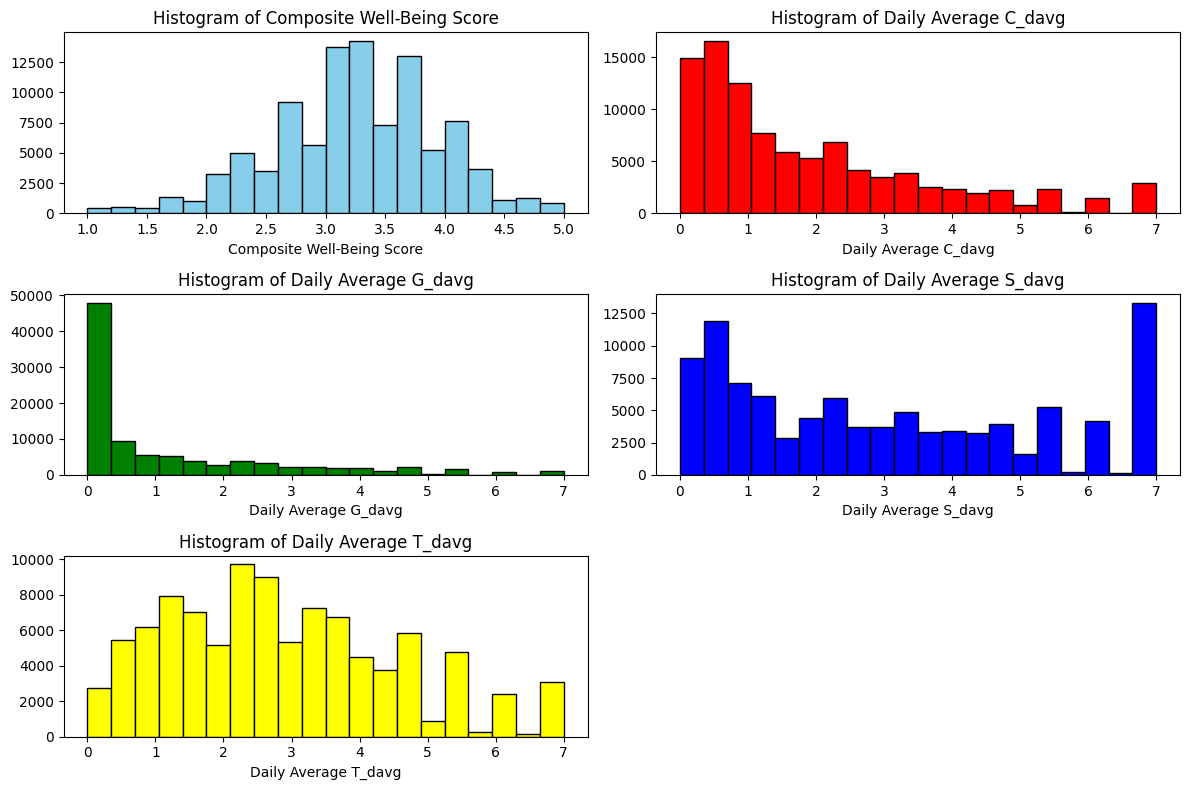

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with a 3x2 grid
plt.figure(figsize=(12, 8))

# Composite Well-Being Score Histogram
plt.subplot(321)
plt.hist(merged_data['composite_wellbeing'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Composite Well-Being Score')
plt.xlabel('Composite Well-Being Score')

# Daily Average C_davg Histogram
plt.subplot(322)
plt.hist(merged_data['C_davg'], bins=20, color='r', edgecolor='black')
plt.title('Histogram of Daily Average C_davg')
plt.xlabel('Daily Average C_davg')

# Daily Average G_davg Histogram
plt.subplot(323)
plt.hist(merged_data['G_davg'], bins=20, color='g', edgecolor='black')
plt.title('Histogram of Daily Average G_davg')
plt.xlabel('Daily Average G_davg')

# Daily Average S_davg Histogram
plt.subplot(324)
plt.hist(merged_data['S_davg'], bins=20, color='b', edgecolor='black')
plt.title('Histogram of Daily Average S_davg')
plt.xlabel('Daily Average S_davg')

# Daily Average T_davg Histogram
plt.subplot(325)
plt.hist(merged_data['T_davg'], bins=20, color='yellow', edgecolor='black')
plt.title('Histogram of Daily Average T_davg')
plt.xlabel('Daily Average T_davg')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.miscmodels.ordinal_model import OrderedModel
drop_cols = ['ID', 'C_we','C_wk','G_we','G_wk','S_we','S_wk','T_we','T_wk', 'Clsep','Conf','Mkmind','Loved', 'Intthg','Cheer',
             'gender', 'minority','deprived','Optm','Usef','Relx','Intp','Engs','Dealpr','Thcklr','Goodme']
df_ordinal = merged_data.drop(columns=drop_cols)

mod_prob = OrderedModel(df_ordinal['composite_wellbeing'], df_ordinal[['C_davg', 'G_davg', 'S_davg', 'T_davg']], distr = 'probit')
res_prob = mod_prob.fit(method='bfgs')
print(res_prob.summary())

Optimization terminated successfully.
         Current function value: 3.083003
         Iterations: 85
         Function evaluations: 87
         Gradient evaluations: 87
                              OrderedModel Results                             
Dep. Variable:     composite_wellbeing   Log-Likelihood:            -3.0299e+05
Model:                    OrderedModel   AIC:                         6.061e+05
Method:             Maximum Likelihood   BIC:                         6.064e+05
Date:                 Fri, 04 Oct 2024                                         
Time:                         06:59:13                                         
No. Observations:                98278                                         
Df Residuals:                    98242                                         
Df Model:                            4                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------

In [ ]:
# Create custom bins and labels for ordinal mapping
bins = [1, 1.79, 2.79, 3.79, 4.79, 5.0]
labels = [1, 2, 3, 4, 5]

# Apply the categorization to transform the scores to ordinal categories
df_ordinal['wellbeing_ordinal'] = pd.cut(merged_data_cleaned['composite_wellbeing'], bins=bins, labels=labels, right=True, include_lowest=True).astype(int)

from statsmodels.miscmodels.ordinal_model import OrderedModel
drop_cols = ['ID', 'C_we','C_wk','G_we','G_wk','S_we','S_wk','T_we','T_wk', 'Clsep','Conf','Mkmind','Loved', 'Intthg','Cheer',
             'gender', 'minority','deprived','Optm','Usef','Relx','Intp','Engs','Dealpr','Thcklr','Goodme']
df_ordinal = merged_data.drop(columns=drop_cols)

mod_prob = OrderedModel(df_ordinal['composite_wellbeing'], df_ordinal[['C_davg', 'G_davg', 'S_davg', 'T_davg']], distr = 'probit')
res_prob = mod_prob.fit(method='bfgs')
print(res_prob.summary())

Optimization terminated successfully.
         Current function value: 3.083003
         Iterations: 85
         Function evaluations: 87
         Gradient evaluations: 87
                              OrderedModel Results                             
Dep. Variable:     composite_wellbeing   Log-Likelihood:            -3.0299e+05
Model:                    OrderedModel   AIC:                         6.061e+05
Method:             Maximum Likelihood   BIC:                         6.064e+05
Date:                 Fri, 04 Oct 2024                                         
Time:                         07:24:21                                         
No. Observations:                98278                                         
Df Residuals:                    98242                                         
Df Model:                            4                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------

In [ ]:
# Create custom bins and labels for ordinal mapping
bins = [1, 1.79, 2.79, 3.79, 4.79, 5.0]
labels = [1, 2, 3, 4, 5]

# Apply the categorization to transform the scores to ordinal categories
df_ordinal['wellbeing_ordinal'] = pd.cut(merged_data_cleaned['composite_wellbeing'], bins=bins, labels=labels, right=True, include_lowest=True).astype(int)

from statsmodels.miscmodels.ordinal_model import OrderedModel
drop_cols = ['ID', 'C_we','C_wk','G_we','G_wk','S_we','S_wk','T_we','T_wk', 'Clsep','Conf','Mkmind','Loved', 'Intthg','Cheer',
             'gender', 'minority','deprived','Optm','Usef','Relx','Intp','Engs','Dealpr','Thcklr','Goodme']
df_ordinal = merged_data.drop(columns=drop_cols)

mod_prob = OrderedModel(df_ordinal['composite_wellbeing'], df_ordinal[['C_davg', 'G_davg', 'S_davg', 'T_davg']], distr = 'logit')
res_prob = mod_prob.fit(method='bfgs')
print(res_prob.summary())

# Extract the log-likelihood of the fitted model
llf_full = res_prob.llf  # Log-likelihood of the fitted model

# Extract the log-likelihood of the null model (model with only an intercept)
llf_null = res_prob.llnull  # Log-likelihood of the null model

# Calculate McFadden's R-squared
mcfadden_r2 = 1 - (llf_full / llf_null)
print("McFadden's R-squared:", mcfadden_r2)


Optimization terminated successfully.
         Current function value: 3.082026
         Iterations: 112
         Function evaluations: 114
         Gradient evaluations: 114
                              OrderedModel Results                             
Dep. Variable:     composite_wellbeing   Log-Likelihood:            -3.0290e+05
Model:                    OrderedModel   AIC:                         6.059e+05
Method:             Maximum Likelihood   BIC:                         6.062e+05
Date:                 Fri, 04 Oct 2024                                         
Time:                         07:32:28                                         
No. Observations:                98278                                         
Df Residuals:                    98242                                         
Df Model:                            4                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------